In [134]:
import pandas as pd
import numpy as np
import geopy.distance
import fiona
from tqdm import tqdm
import matplotlib.pyplot as plt

### Shape file to CSV

In [135]:
df_SC = fiona.open('MINEDEX - Cu-Pb-Zn (TARGET) Zn (Site Commodity).shp')
df_SC.next()['properties']

/Users/zhengyuchen/opt/anaconda3/envs/cits5508-fix/lib/python3.7/site-packages/ipykernel_launcher.py:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  


OrderedDict([('SITE_CODE', 'S0001179'),
             ('SITE_TITLE', 'Bonnie Rock BM'),
             ('SHORT_NAME', 'Bonnie Rock BM'),
             ('SITE_COMMO', 'Pb, Ag, Zn, Mn'),
             ('SITE_TYPE_', 'Deposit'),
             ('SITE_SUB_T', 'Unspecified'),
             ('SITE_STAGE', 'Undeveloped'),
             ('TARGET_COM', 'COPPER - LEAD - ZINC'),
             ('COMMODITY', 'BASE METAL'),
             ('PROJ_CODE', 'J00453'),
             ('PROJ_TITLE', 'Gossan Dam - Bonnie Rock'),
             ('CONFIDENTI', 'Public'),
             ('POINT_CONF', 'Public'),
             ('LATITUDE', -30.694559),
             ('LONGITUDE', 118.315903),
             ('WEB_LINK',
              'https://minedex.dmirs.wa.gov.au/Web/common/jump.jsp?jumpType=SITE&id=S0001179'),
             ('EXTRACT_DA', '2021-07-28')])

In [136]:
df = fiona.open('MINEDEX - Cu-Pb-Zn (TARGET).shp')
df.next()['properties']

/Users/zhengyuchen/opt/anaconda3/envs/cits5508-fix/lib/python3.7/site-packages/ipykernel_launcher.py:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  


OrderedDict([('SITE_CODE', 'S0000854'),
             ('SITE_TITLE', 'Horseshoe Lights'),
             ('SHORT_NAME', 'Horseshoe Lights'),
             ('SITE_COMMO', 'Cu, Au, Ag'),
             ('SITE_TYPE_', 'Mine'),
             ('SITE_SUB_T', 'Openpit'),
             ('SITE_STAGE', 'Care and Maintenance'),
             ('TARGET_COM', 'COPPER - LEAD - ZINC'),
             ('COMMODITY', 'BASE METAL'),
             ('PROJ_CODE', 'J00164'),
             ('PROJ_TITLE', 'Horseshoe Lights'),
             ('CONFIDENTI', 'Public'),
             ('POINT_CONF', 'Public'),
             ('LATITUDE', -25.361719),
             ('LONGITUDE', 118.6213),
             ('WEB_LINK',
              'https://minedex.dmirs.wa.gov.au/Web/common/jump.jsp?jumpType=SITE&id=S0000854'),
             ('EXTRACT_DA', '2021-07-28')])

In [137]:
ordered_dicts = []

for item in df_SC.items():
    ordered_dicts.append(item[1])
df_SC = pd.DataFrame([ordered_dicts[i]['properties'] for i, _ in enumerate(ordered_dicts)])
df_SC.head()

,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY,PROJ_CODE,PROJ_TITLE,CONFIDENTI,POINT_CONF,LATITUDE,LONGITUDE,WEB_LINK,EXTRACT_DA
0,S0001179,Bonnie Rock BM,Bonnie Rock BM,"Pb, Ag, Zn, Mn",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00453,Gossan Dam - Bonnie Rock,Public,Public,-30.694559,118.315903,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
1,S0001250,Manindi - Freddie Well Resource Group,Manindi Res Gp,"Zn, Cu",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00522,Manindi,Public,Public,-28.751856,118.683032,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
2,S0001256,Gossan Hill Portal,Gossan Hill U/G,"Cu, Zn, Pb, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.765087,116.962407,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
3,S0001257,Scuddles Portal,Scuddles U/G,"Zn, Pb, Cu, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.744567,116.945103,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
4,S0001335,Hammerhead - Lennons Find,Hammerhead,"Zn, Pb, Ag",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00563,Lennons Find,Public,Public,-21.355850,120.239098,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28


In [138]:
ordered_dicts = []

for item in df.items():
    ordered_dicts.append(item[1])
df = pd.DataFrame([ordered_dicts[i]['properties'] for i, _ in enumerate(ordered_dicts)])
df.head()

,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY,PROJ_CODE,PROJ_TITLE,CONFIDENTI,POINT_CONF,LATITUDE,LONGITUDE,WEB_LINK,EXTRACT_DA
0,S0000854,Horseshoe Lights,Horseshoe Lights,"Cu, Au, Ag",Mine,Openpit,Care and Maintenance,COPPER - LEAD - ZINC,BASE METAL,J00164,Horseshoe Lights,Public,Public,-25.361719,118.621300,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
1,S0001179,Bonnie Rock BM,Bonnie Rock BM,"Pb, Ag, Zn, Mn",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00453,Gossan Dam - Bonnie Rock,Public,Public,-30.694559,118.315903,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
2,S0001213,Copper Gorge,Copper Gorge,Cu,Prospect,Drillhole,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00486,Otway,Public,Public,-21.608749,120.350098,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
3,S0001250,Manindi - Freddie Well Resource Group,Manindi Res Gp,"Zn, Cu",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00522,Manindi,Public,Public,-28.751856,118.683032,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
4,S0001256,Gossan Hill Portal,Gossan Hill U/G,"Cu, Zn, Pb, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.765087,116.962407,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28


In [139]:
df_Zn = df[df['SITE_COMMO'].str.contains('Zn')]
df_Zn.shape

(964, 17)

In [140]:
df_SC.shape

(964, 17)

In [141]:
# The SITE_COMMO column in MINEDEX-Cu-Pb-Zn(TARGET).csv contains Zn
# -> MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv
df_SC.to_csv('MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv')
df.to_csv('MINEDEX-Cu-Pb-Zn(TARGET)')

In [142]:
df_minedex = pd.read_csv('MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv')

### Filter CSV

In [143]:
df_minedex = df_minedex.loc[(df_minedex['SITE_TYPE_'] == 'Mine') | (df_minedex['SITE_TYPE_'] == 'Deposit')]

In [144]:
df_minedex.shape

(159, 18)

In [145]:
df_minedex.head()

,Unnamed: 0,SITE_CODE,SITE_TITLE,SHORT_NAME,SITE_COMMO,SITE_TYPE_,SITE_SUB_T,SITE_STAGE,TARGET_COM,COMMODITY,PROJ_CODE,PROJ_TITLE,CONFIDENTI,POINT_CONF,LATITUDE,LONGITUDE,WEB_LINK,EXTRACT_DA
0,0,S0001179,Bonnie Rock BM,Bonnie Rock BM,"Pb, Ag, Zn, Mn",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00453,Gossan Dam - Bonnie Rock,Public,Public,-30.694559,118.315903,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
1,1,S0001250,Manindi - Freddie Well Resource Group,Manindi Res Gp,"Zn, Cu",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00522,Manindi,Public,Public,-28.751856,118.683032,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
2,2,S0001256,Gossan Hill Portal,Gossan Hill U/G,"Cu, Zn, Pb, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.765087,116.962407,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
3,3,S0001257,Scuddles Portal,Scuddles U/G,"Zn, Pb, Cu, Ag, Au",Mine,Decline,Operating,COPPER - LEAD - ZINC,BASE METAL,J00527,Golden Grove,Public,Public,-28.744567,116.945103,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28
4,4,S0001335,Hammerhead - Lennons Find,Hammerhead,"Zn, Pb, Ag",Deposit,Unspecified,Undeveloped,COPPER - LEAD - ZINC,BASE METAL,J00563,Lennons Find,Public,Public,-21.355850,120.239098,https://minedex.dmirs.wa.gov.au/Web/common/jum...,2021-07-28


In [146]:
#Count by site type
df_minedex['SITE_TYPE_'].value_counts()

Mine       95
Deposit    64
Name: SITE_TYPE_, dtype: int64

In [147]:
df_minedex['SITE_COMMO'].value_counts()

Pb, Zn, Ag                              23
Zn, Pb                                  15
Zn, Pb, Ag                              13
Cu, Zn, Pb, Ag, Au                       9
Pb, Zn                                   8
Zn, Cu, Ag, Pb                           6
Zn, Cu                                   6
Zn, Cu, Pb, Ag, Au                       5
Zn, Pb, Cu, Ag, Au                       4
Cu, Zn, Ag                               3
Zn, Cu, Pb, Ag                           3
Cu, Zn                                   3
Cu, Au, Ag, Zn, Pd, CuSpec, Ccl, Mal     3
Cu, Pb, Zn, Au, Ag                       2
Zn, Pb, Ag, Cu                           2
Pb, Ag, Zn, Cu                           2
Cu, Pb, Zn, Ag                           2
Cu, Au, Ag, Zn, Pd                       2
Cu, Zn, Ag, Au                           2
Zn, Pb, Ag, Ba                           2
Zn, Au                                   2
Pb, Zn, Cu, Ag, Au                       2
Zn, Cu, Ag                               2
Zn, Cu, Ag,

In [148]:
data = {'minedex_lat': df_minedex['LATITUDE'], 'minedex_lon': df_minedex['LONGITUDE'], 'minedex_site': df_minedex['SITE_CODE']}
mindex_coords_df = pd.DataFrame(data)

In [149]:
mindex_coords_df

,minedex_lat,minedex_lon,minedex_site
0,-30.694559,118.315903,S0001179
1,-28.751856,118.683032,S0001250
2,-28.765087,116.962407,S0001256
3,-28.744567,116.945103,S0001257
4,-21.355850,120.239098,S0001335
...,...,...,...
872,-21.146509,119.211954,S0226152
881,-28.483949,121.169987,S0229619
889,-19.222219,122.321701,S0230644
899,-18.321529,125.778999,S0231252


In [150]:
mindex_coords_df['minedex_site'].nunique()

159

In [151]:
mindex_coords = list(zip(mindex_coords_df['minedex_lat'], mindex_coords_df['minedex_lon']))

In [152]:
mindex_coords_df['coords'] = mindex_coords
mindex_coords_df.head()

,minedex_lat,minedex_lon,minedex_site,coords
0,-30.694559,118.315903,S0001179,"(-30.694559, 118.315903)"
1,-28.751856,118.683032,S0001250,"(-28.751856, 118.683032)"
2,-28.765087,116.962407,S0001256,"(-28.765087, 116.962407)"
3,-28.744567,116.945103,S0001257,"(-28.744567, 116.945103)"
4,-21.355850,120.239098,S0001335,"(-21.35585, 120.239098)"


In [153]:
mindex_coords_df.shape

(159, 4)

In [154]:
mindex_coords_df['minedex_site'].nunique()

159

In [155]:
mindex_coords_df['coords'] = mindex_coords
mindex_coords_df.head()

,minedex_lat,minedex_lon,minedex_site,coords
0,-30.694559,118.315903,S0001179,"(-30.694559, 118.315903)"
1,-28.751856,118.683032,S0001250,"(-28.751856, 118.683032)"
2,-28.765087,116.962407,S0001256,"(-28.765087, 116.962407)"
3,-28.744567,116.945103,S0001257,"(-28.744567, 116.945103)"
4,-21.355850,120.239098,S0001335,"(-21.35585, 120.239098)"


### WAMEX

In [156]:
df_wamex = pd.read_csv('WAMEX_with_In_Ge_MINDEX_available_minerals.csv')
df_wamex.shape

(23736, 11)

In [157]:
wamex_coords = list(zip(df_wamex['lat'], df_wamex['long']))
wamex_coords[1:5]

[(-22.509684, 117.683172),
 (-22.509693, 117.683221),
 (-22.509729, 117.683279),
 (-22.509738, 117.683328)]

In [158]:
len(wamex_coords)

23736

In [159]:
wamex_coords_nodupl = tuple(set(wamex_coords))
len(wamex_coords_nodupl)

18241

### Caculate Distance

In [160]:
new = pd.DataFrame(columns=['minedex_coords', 'minedex_site', 'wamex_lat', 'wamex_lon', 'distance',])

In [161]:
#simple distance function try
def calc_distance(coords_a, coords_b):
       dist = geopy.distance.distance(coords_a, coords_b)
       return(dist)

In [162]:
calc_distance((-17.234642, 128.032146), (-26.78737, 118.574407))

Distance(1438.3974155883463)

In [163]:
wamex_coords_nodupl[1]

(-22.075205, 119.17515)

In [164]:
for i in tqdm(range(0, len(wamex_coords_nodupl))):
    for j in range(0, len(mindex_coords_df)):
            comp = mindex_coords_df.iloc[j]['coords']
            dist = calc_distance(wamex_coords_nodupl[i], comp)
            if dist < 15:
                new_row = {'minedex_coords': comp, 'minedex_site': mindex_coords_df.iloc[j]['minedex_site'],'wamex_lat':wamex_coords_nodupl[i][0],'wamex_lon': wamex_coords_nodupl[i][1], 'distance':dist}
                new = new.append(new_row, ignore_index=True)

100%|██████████| 18241/18241 [12:41<00:00, 23.96it/s]


In [165]:
len(new)

3991

In [166]:
new.to_csv('Distance_Minedex_WAMEX_In_Ge.csv')

In [167]:
new.head()

,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,"(-23.715655, 119.281652)",S0002505,-23.722923,119.288533,1.06784626317382 km
1,"(-23.715655, 119.281652)",S0002505,-23.741126,119.347260,7.260152057258165 km
2,"(-27.05574, 117.697197)",S0001380,-26.991805,117.638810,9.151869117283306 km
3,"(-28.40897, 121.147797)",S0002897,-28.493770,121.080858,11.45921164233483 km
4,"(-28.40897, 121.147797)",S0002898,-28.493770,121.080858,11.45921164233483 km


### Merge with actual assays

In [168]:
distances = pd.read_csv('Distance_Minedex_WAMEX_In_Ge.csv')

In [169]:
distances.head()

,Unnamed: 0,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,0,"(-23.715655, 119.281652)",S0002505,-23.722923,119.288533,1.06784626317382 km
1,1,"(-23.715655, 119.281652)",S0002505,-23.741126,119.347260,7.260152057258165 km
2,2,"(-27.05574, 117.697197)",S0001380,-26.991805,117.638810,9.151869117283306 km
3,3,"(-28.40897, 121.147797)",S0002897,-28.493770,121.080858,11.45921164233483 km
4,4,"(-28.40897, 121.147797)",S0002898,-28.493770,121.080858,11.45921164233483 km


In [170]:
df_wamex.head()

,Unnamed: 0,Zn,Ag,Cu,Pb,Au,Co,In,Ge,lat,long
0,396,107.0,0.16,270.0,5.8,0.0015,38.4,0.155,0.14,-22.509657,117.683133
1,397,110.0,0.07,280.0,5.4,0.0010,37.2,0.151,0.15,-22.509684,117.683172
2,398,107.0,0.10,305.0,5.7,0.0018,37.4,0.143,0.14,-22.509693,117.683221
3,399,55.0,0.07,78.4,44.0,0.0848,10.5,0.513,0.14,-22.509729,117.683279
4,400,55.0,0.09,84.2,47.0,0.1270,14.6,0.543,0.15,-22.509738,117.683328


In [171]:
Merged_lessthan15km = pd.merge(df_wamex, distances, how='inner', left_on=['lat', 'long'], right_on=['wamex_lat', 'wamex_lon'])

In [172]:
Merged_lessthan15km.to_csv('Merged_lessthan15km_In_Ge.csv')

### Modeling

In [173]:
df = pd.read_csv('Merged_lessthan15km_In_Ge.csv')

In [174]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'lat', 'long', 'Unnamed: 0_y', 'minedex_coords',
       'minedex_site', 'distance']).drop_duplicates()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 4905
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zn         1994 non-null   float64
 1   Ag         2067 non-null   float64
 2   Cu         2066 non-null   float64
 3   Pb         2015 non-null   float64
 4   Au         1878 non-null   float64
 5   Co         2076 non-null   float64
 6   In         2076 non-null   float64
 7   Ge         2076 non-null   float64
 8   wamex_lat  2076 non-null   float64
 9   wamex_lon  2076 non-null   float64
dtypes: float64(10)
memory usage: 178.4 KB


In [176]:
df = df.dropna()
df.shape

(1792, 10)

In [177]:
df.minerals = df.drop(columns=['wamex_lat','wamex_lon'])
df.minerals

/Users/zhengyuchen/opt/anaconda3/envs/cits5508-fix/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Zn,Ag,Cu,Pb,Au,Co,In,Ge
6,525.0,0.28,81.2,590.0,0.005,48.8,0.056,0.060
9,142.0,0.07,90.0,31.2,0.005,22.7,0.084,0.110
10,47.0,0.36,101.5,95.6,0.005,7.3,0.030,0.100
11,31.0,0.05,65.4,8.3,0.005,7.6,0.031,0.025
12,68.0,0.15,205.0,17.5,0.005,3.6,0.127,0.180
...,...,...,...,...,...,...,...,...
4837,533.0,13.50,99500.0,50.0,0.443,224.0,3.800,10.000
4841,942.0,4.50,16400.0,31.0,0.035,134.0,3.020,10.000
4845,1400.0,0.50,3960.0,33.0,0.026,146.0,0.400,10.000
4849,236.0,14.00,115000.0,12.0,0.350,698.0,23.200,10.000


### Log Transform

In [178]:
df_log.columns='log_'+df.minerals.columns
df_log.columns

Index(['log_Zn', 'log_Ag', 'log_Cu', 'log_Pb', 'log_Au', 'log_Co', 'log_In',
       'log_Ge'],
      dtype='object')

In [179]:
df_log = pd.DataFrame(np.log(df.minerals.values+1),columns=df_log.columns)
df_log

,log_Zn,log_Ag,log_Cu,log_Pb,log_Au,log_Co,log_In,log_Ge
0,6.265301,0.246860,4.409155,6.381816,0.004988,3.908015,0.054488,0.058269
1,4.962845,0.067659,4.510860,3.471966,0.004988,3.165475,0.080658,0.104360
2,3.871201,0.307485,4.629863,4.570579,0.004988,2.116256,0.029559,0.095310
3,3.465736,0.048790,4.195697,2.230014,0.004988,2.151762,0.030529,0.024693
4,4.234107,0.139762,5.327876,2.917771,0.004988,1.526056,0.119559,0.165514
...,...,...,...,...,...,...,...,...
1787,6.280396,2.674149,11.507923,3.931826,0.366724,5.416100,1.568616,2.397895
1788,6.849066,1.704748,9.705098,3.465736,0.034401,4.905275,1.391282,2.397895
1789,7.244942,0.405465,8.284252,3.526361,0.025668,4.990433,0.336472,2.397895
1790,5.468060,2.708050,11.652696,2.564949,0.300105,6.549651,3.186353,2.397895


### Zn

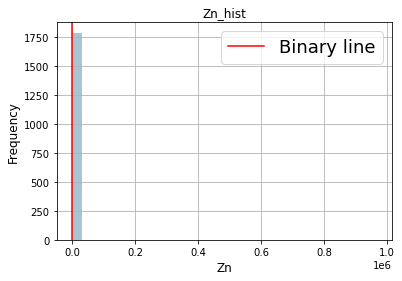

In [197]:
fig, ax = plt.subplots()
df.minerals['Zn'].hist(color='#A9C5D3', bins=30)
plt.axvline(df.minerals['Zn'].quantile(), color='r', label='Binary line')
plt.legend(fontsize=18, loc='best')
ax.set_xlabel('Zn', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Zn_hist', fontsize=12)
plt.show()

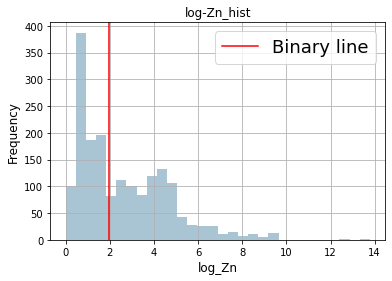

In [198]:
fig, ax = plt.subplots()
df_log['log_Zn'].hist(color='#A9C5D3', bins=30)
plt.axvline(df_log['log_Zn'].quantile(), color='r', label='Binary line')
plt.legend(fontsize=18, loc='best')
ax.set_xlabel('log_Zn', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('log-Zn_hist', fontsize=12)
plt.show()

#### Linear Regression

In [199]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [200]:
X = df_log.drop(['log_Zn'], axis =1)
y = df_log['log_Zn']

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))

train MSE:  1.4848739918365528
test MSE:  0.9413559476689094


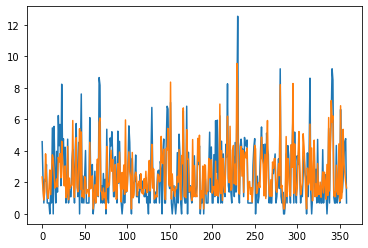

In [201]:
plt.plot(range(0,len(test_pred)), y_test, test_pred)

#### Random Forest

In [202]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))


train MSE:  0.18159265771717306
test MSE:  0.6764687596399063


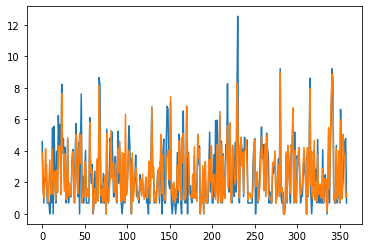

In [203]:
plt.plot(range(0,len(test_pred)), y_test, test_pred)

### In

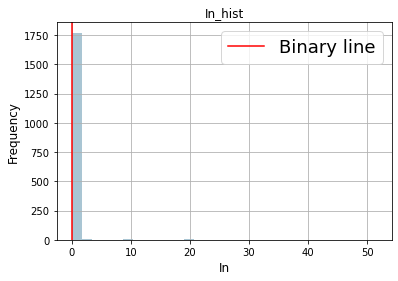

In [204]:
fig, ax = plt.subplots()
df.minerals['In'].hist(color='#A9C5D3', bins=30)
plt.axvline(df.minerals['In'].quantile(), color='r', label='Binary line')
plt.legend(fontsize=18, loc='best')
ax.set_xlabel('In', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('In_hist', fontsize=12)
plt.show()

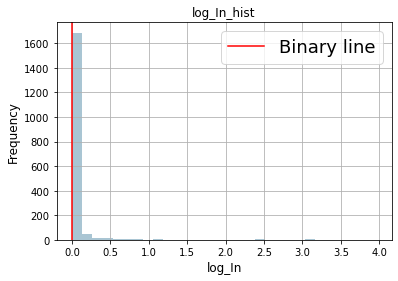

In [205]:
fig, ax = plt.subplots()
df_log['log_In'].hist(color='#A9C5D3', bins=30)
plt.axvline(df_log['log_In'].quantile(), color='r', label='Binary line')
plt.legend(fontsize=18, loc='best')
ax.set_xlabel('log_In', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('log_In_hist', fontsize=12)
plt.show()

#### Linear Regression

In [206]:
X = df_log.drop(['log_In'], axis =1)
y = df_log['log_In']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))

train MSE:  0.04094925878422788
test MSE:  0.07943615887033703


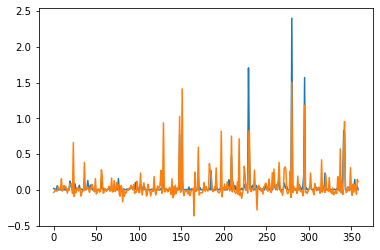

In [207]:
plt.plot(range(0,len(test_pred)), y_test, test_pred)

#### Random Forest

In [208]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))

train MSE:  0.0028541854759835347
test MSE:  0.028197096854836987


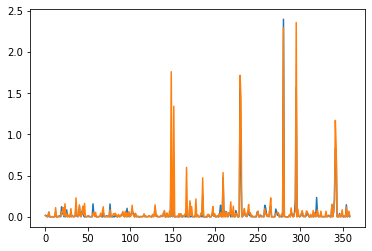

In [209]:
plt.plot(range(0,len(test_pred)), y_test, test_pred)

### Ge

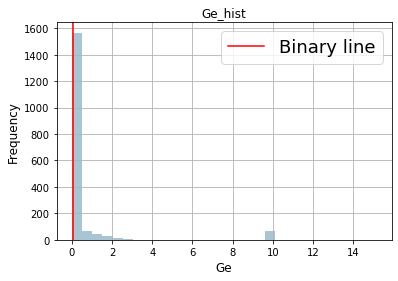

In [210]:
fig, ax = plt.subplots()
df.minerals['Ge'].hist(color='#A9C5D3', bins=30)
plt.axvline(df.minerals['Ge'].quantile(), color='r', label='Binary line')
plt.legend(fontsize=18, loc='best')
ax.set_xlabel('Ge', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Ge_hist', fontsize=12)
plt.show()

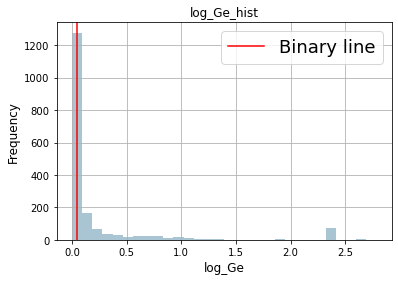

In [211]:
fig, ax = plt.subplots()
df_log['log_Ge'].hist(color='#A9C5D3', bins=30)
plt.axvline(df_log['log_Ge'].quantile(), color='r', label='Binary line')
plt.legend(fontsize=18, loc='best')
ax.set_xlabel('log_Ge', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('log_Ge_hist', fontsize=12)
plt.show()

#### Linear Regression

In [214]:
X = df_log.drop(['log_Ge'], axis =1)
y = df_log['log_Ge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))

train MSE:  0.2011904824877862
test MSE:  0.20569138068117923


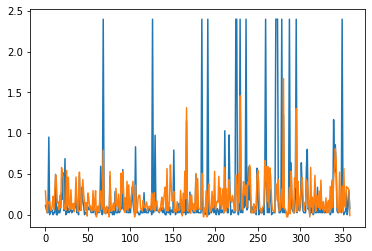

In [215]:
plt.plot(range(0,len(test_pred)), y_test, test_pred)

#### Random Forest

In [216]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("train MSE: ", mean_squared_error(train_pred, y_train))
print("test MSE: ", mean_absolute_error(test_pred, y_test))

train MSE:  0.009290194039310378
test MSE:  0.09794425731401879


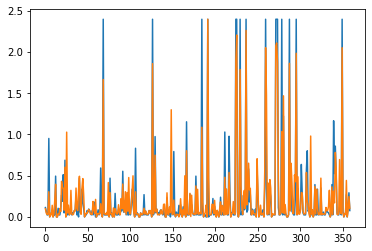

In [217]:
plt.plot(range(0,len(test_pred)), y_test, test_pred)